# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [188]:
import pandas as pd
try:
    df = pd.read_csv('sprint05\real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [190]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15206,14,4150000.0,35.00,2016-07-12T00:00:00,1,NaN,25.0,17.50,15,False,...,8.00,2.0,Санкт-Петербург,36784.0,11718.0,1.0,683.0,2.0,713.0,316.0
6366,4,3990000.0,49.72,2018-08-18T00:00:00,3,NaN,19.0,21.04,14,NaN,...,14.04,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,80.0
11504,7,9650000.0,104.66,2018-09-28T00:00:00,3,NaN,18.0,48.41,5,NaN,...,30.59,NaN,Санкт-Петербург,32158.0,8297.0,0.0,NaN,1.0,564.0,20.0
13235,5,2650000.0,60.00,2018-10-02T00:00:00,3,2.55,5.0,41.80,3,NaN,...,6.10,1.0,Приморск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2384,0,1300000.0,23.00,2016-08-05T00:00:00,1,2.75,19.0,15.00,2,NaN,...,NaN,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,21.0
23581,18,6300000.0,54.10,2018-08-02T00:00:00,2,2.60,25.0,32.70,2,NaN,...,9.80,NaN,Санкт-Петербург,36784.0,11718.0,1.0,683.0,2.0,713.0,79.0
17668,5,7800000.0,74.20,2018-11-26T00:00:00,3,2.60,16.0,45.00,3,NaN,...,10.00,NaN,Санкт-Петербург,50035.0,15363.0,0.0,NaN,0.0,NaN,91.0
11148,12,8000000.0,100.00,2018-07-09T00:00:00,4,2.70,7.0,53.90,1,NaN,...,28.10,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21722,9,4550000.0,66.70,2019-04-12T00:00:00,3,NaN,5.0,42.10,4,NaN,...,NaN,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3481,10,3450000.0,46.00,2019-04-11T00:00:00,1,2.80,16.0,20.00,2,NaN,...,11.00,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

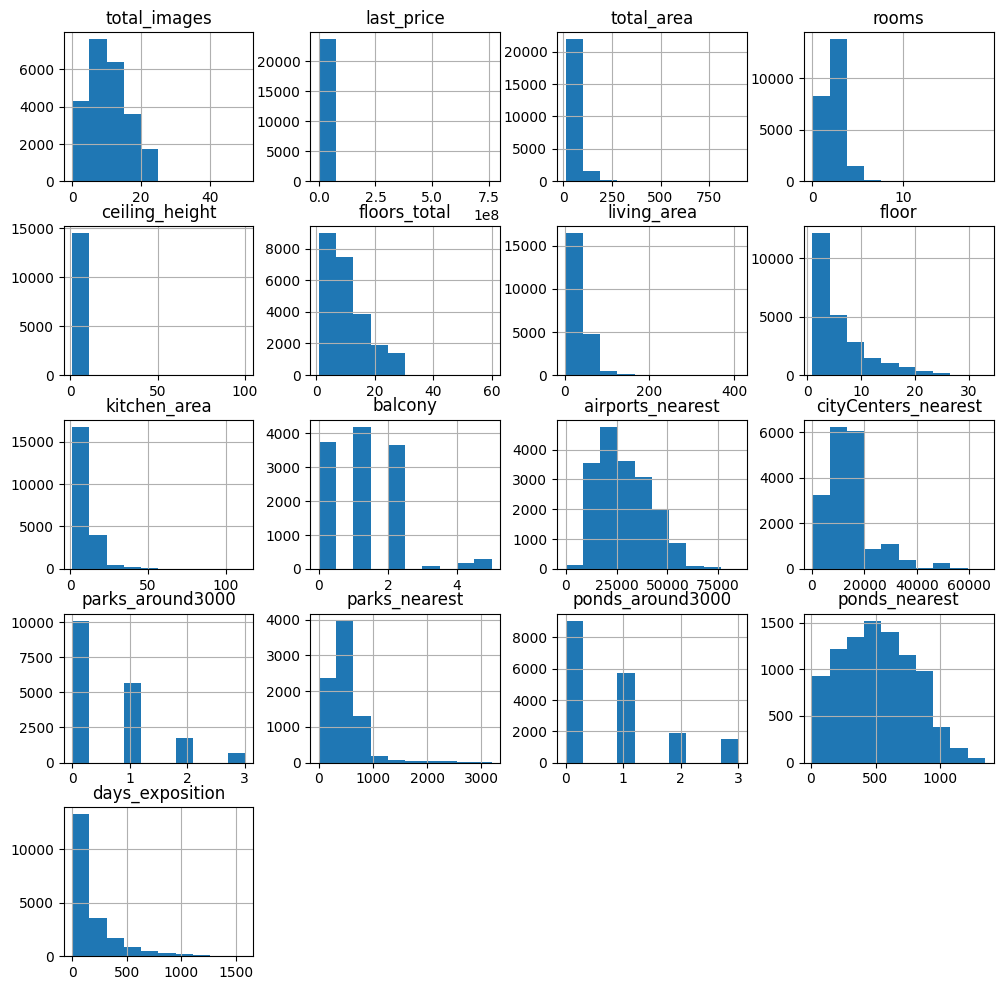

In [191]:
df.hist(figsize=(12, 12))

### Предобработка данных

In [192]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

пропущенные значения в колонке '*balcony*' заполним нулями: вполне вероятно, значение пропущено потому что балкона нет

In [193]:
df.loc[df.balcony.isna(),'balcony'] = 0

посмотрим, можно ли установить какие-нибудь связи между '*ponds_around3000*' и '*ponds_nearest*' и то же самое '*parks*'.  
В переменных '*nearest*' пропущено гораздо больше значений, чем в '*around3000*'. попробуем узнать, можно ли по значениям в '*around3000*' как-то восстановить '*nearest*'

In [194]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [195]:

df[df.parks_around3000.isna()]['parks_nearest'].unique()
df[df.ponds_around3000.isna()]['ponds_nearest'].unique()
df[df.parks_nearest.isna()]['parks_around3000'].unique()
df[df.ponds_nearest.isna()]['ponds_around3000'].unique()
df.parks_nearest.unique()
df.ponds_nearest.unique()


array([nan])

array([nan])

array([ 0., nan])

array([ 0., nan])

array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 3.100e+02,
       2.940e+02, 5.900e+02, 4.200e+02, 7.590e+02, 2.480e+02, 5.170e+02,
       4.110e+02, 4.520e+02, 5.320e+02, 4.590e+02, 7.250e+02, 4.700e+01,
       6.200e+02, 6.750e+02, 5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02,
       6.480e+02, 3.820e+02, 3.340e+02, 1.670e+02, 4.450e+02, 2.310e+02,
       5.110e+02, 7.510e+02, 6.660e+02, 3.840e+02, 1.270e+02, 2.410e+02,
       4.880e+02, 1.560e+02, 5.760e+02, 2.850e+02, 6.330e+02, 1.500e+01,
       2.150e+02, 5.330e+02, 1.410e+02, 3.660e+02, 3.410e+02, 5.890e+02,
       3.440e+02, 5.080e+02, 4.170e+02, 7.620e+02, 4.410e+02, 5.590e+02,
       7.490e+02, 1.230e+02, 5.010e+02, 1.000e+01, 1.133e+03, 1.205e+03,
       5.160e+02, 8.600e+02, 2.760e+02, 9.800e+02, 4.630e+02, 5.910e+02,
       2.390e+02, 6.510e+02, 1.021e+03, 4.850e+02, 5.860e+02, 3.700e+02,
       6.880e+02, 2.750e+02, 5.460e+02, 4.660e+02, 1.390e+02, 2.510e+02,
       5.370e+02, 6.270e+02, 1.040e+02, 4.500e+02, 

array([ 755.,   nan,  574., ...,  959.,   40., 1134.])

ничего не удалось выяснить. заполним значениями по умолчанию: '*ponds_around3000*' и '*parks_around3000*' заменим NaN на 0 (считаем, что если не указано, значит, поблизости просто нет парка/пруда). '*parks_nearest*' и '*ponds_nearest*' оставим NaN.  
Можно было бы также Поставить *PositiveInfinity*, но такие значения плохо повлияли бы на расчеты

In [196]:
df.loc[df.ponds_around3000.isna(),'ponds_around3000'] = 0
df.loc[df.parks_around3000.isna(),'parks_around3000'] = 0

'*locality_name*' заменим пропуски на кавычки (''), чтобы с этими строками (тх всего 48) можно было работать. Вероятно, продавец забыл указать населенный пункт

In [197]:
df.loc[df.locality_name.isna(), 'locality_name'] = ''

проанализируем незаполненные значения floors_total

<AxesSubplot:>

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,NaN,NaN,NaN,1,NaN,...,NaN,0.0,посёлок Щеглово,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0
15989,1,4100000.0,74.50,2017-04-22T00:00:00,3,NaN,NaN,NaN,1,NaN,...,NaN,0.0,Красное Село,25382.0,28806.0,0.0,NaN,0.0,NaN,72.0


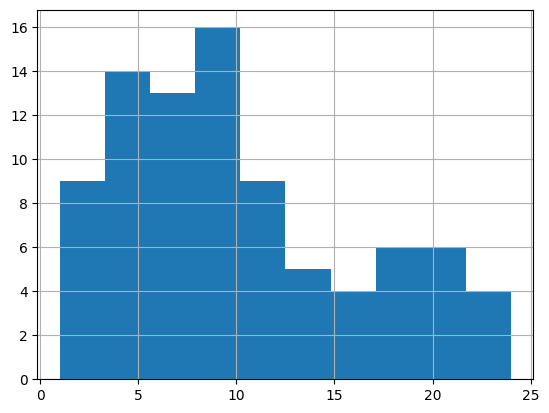

In [198]:
df[df.floors_total.isna()].floor.hist()
df[(df.floors_total.isna()) & (df.floor==1)]

там где floor == 1 (первый этаж) заполним floors_total каким-нибудь значением, например, 7  
в остальных случаях заполним floors_total = floor (будем считать, что продавец не заполнил значение, потому что этаж последний)

In [199]:
df.loc[(df.floors_total.isna()) & (df.floor == 1), 'floors_total'] = 7
df.loc[df.floors_total.isna(), 'floors_total'] = df[df.floors_total.isna()]['floor']

проанализируем ceiling_height

In [200]:
df[df.ceiling_height < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,0.0,городской посёлок Мга,NaN,NaN,0.0,NaN,0.0,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,0.0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


добавим 1 м к высоте потолков для тех квартир, где высота потолка менее 2 м. будем считать, что продавец допустил опечатку

In [201]:
df.loc[df.ceiling_height < 2, 'ceiling_height'] = df[df.ceiling_height < 2]['ceiling_height'] + 1

для тех высот потолков, которые более 20 м, разделим их на 10. будем считать, что продавец допустил опечатку

In [202]:
df.loc[df.ceiling_height > 20, 'ceiling_height'] = df[df.ceiling_height > 20]['ceiling_height'] / 10

пропущенные значения заполним медианой

In [203]:
df.loc[df.ceiling_height.isna(), 'ceiling_height'] = df.ceiling_height.median()

пропущенные значения в living_area заполним следующим образом:  
рассчитаем среднее значение отношения жилой площади к общей  
умножим общую площадь на полученное значение

In [204]:
df['living_to_total_area'] = df.living_area / df.total_area
living_to_total_area_mean = df.living_to_total_area.mean()
living_to_total_area_mean
df.loc[df.living_area.isna(), 'living_area'] = df[df.living_area.isna()]['total_area'] * living_to_total_area_mean

0.5647655216993234

проанализируем kitchen_area

<AxesSubplot:xlabel='non_living_area', ylabel='kitchen_to_non'>

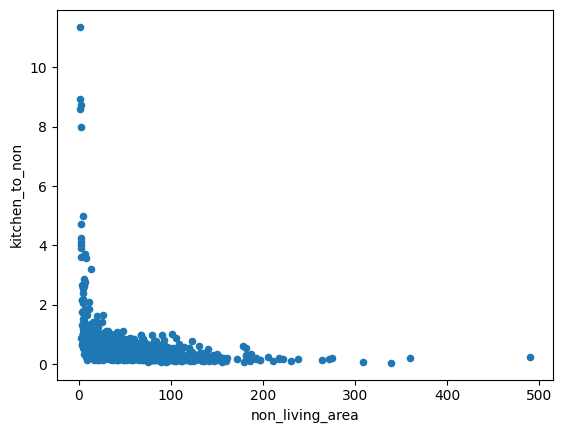

In [205]:
df['non_living_area'] = df.total_area - df.living_area
df['kitchen_to_non'] = df.kitchen_area / df.non_living_area
df.plot(kind='scatter', x='non_living_area', y='kitchen_to_non')

заполним kitechen_area следующим образом:
рассчитаем non_living_area как разницу между общей площадью и жилой
посчитаем среднее значение отношения площади кухни к нежилой площади
заполним произведением нежилой площади на это рассчитанное значение

In [206]:
df['kitchen_to_non'] = df.kitchen_area / df.non_living_area
kitchen_to_non_mean = df.kitchen_to_non.mean()
kitchen_to_non_mean
df.loc[df.kitchen_area.isna(), 'kitchen_area'] = df[df.kitchen_area.isna()]['non_living_area'] * kitchen_to_non_mean

0.42969538061522733

удалим технические поля

In [207]:
df = df.drop(columns=['living_to_total_area','non_living_area','kitchen_to_non'])

проанализиуруем пропущенные значения is_apartment

In [208]:
df[df.is_apartment == True]['is_apartment'].count()
df[df.is_apartment == False]['is_apartment'].count()

50

2725

проставленных значений True так мало, что, видимо, их мало в целом и пропущенные значения выглядит разумным заполнить значением False для всех

In [209]:
df.loc[df.is_apartment.isna(), 'is_apartment'] = False

In [210]:
df[df.days_exposition.isna()]['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2019-04-18T00:00:00',
       '2018-11-18T00:00:00', '2018-12-02T00:00:00',
       '2019-01-31T00:00:00', '2018-11-22T00:00:00',
       '2017-09-22T00:00:00', '2019-03-27T00:00:00',
       '2018-12-27T00:00:00', '2019-03-13T00:00:00',
       '2019-04-23T00:00:00', '2019-04-09T00:00:00',
       '2019-03-23T00:00:00', '2017-10-30T00:00:00',
       '2019-02-07T00:00:00', '2019-04-06T00:00:00',
       '2019-03-10T00:00:00', '2019-04-29T00:00:00',
       '2018-08-20T00:00:00', '2019-02-27T00:00:00',
       '2019-03-20T00:00:00', '2018-07-11T00:00:00',
       '2019-02-28T00:00:00', '2019-04-08T00:00:00',
       '2017-04-11T00:00:00', '2019-03-08T00:00:00',
       '2019-03-14T00:00:00', '2019-03-30T00:00:00',
       '2019-04-11T00:00:00', '2017-08-23T00:00:00',
       '2019-04-16T00:00:00', '2018-09-08T00:00:00',
       '2019-04-17T00:00:00', '2018-09-07T00:00:00',
       '2019-04-01T00:00:00', '2017-12-12T00:00:00',
       '2019-04-24T00:00:00', '2017-12-15T00:0

никаких идей, как заполнить пропущенные значения в поле days_exposition

поменяем типы нескольких полей:  
 first_day_exposition  object  -> datetime - чтобы работать с данными как  датами  
 floors_total          float64 -> int - чтобы сэкономить место в памяти  
 balcony               float64 -> int - чтобы сэкономить место в памяти  
 parks_around3000      float64 -> int - чтобы сэкономить место в памяти  
 ponds_around3000      float64 -> int - чтобы сэкономить место в памяти  
 days_exposition       float64 -> int - чтобы сэкономить место в памяти  
 is_apartment          object  -> bool - чтобы работать с данными как с булевыми значениями  


In [211]:
df.loc[:,'first_day_exposition'] = pd.to_datetime(df.first_day_exposition, format='%Y-%m-%dT')

In [212]:
df.floors_total = df.floors_total.astype(int)
df.balcony = df.balcony.astype(int)
df.parks_around3000 = df.parks_around3000.astype(int)
df.ponds_around3000 = df.ponds_around3000.astype(int)
df.days_exposition = df.days_exposition.astype(int, errors='ignore')
df.is_apartment = df.is_apartment.astype('bool', errors='ignore')

In [216]:
df.locality_name = df.locality_name.str.lower()\
    .replace('ё', 'е', regex=True)\
    .replace('поселок городского типа', 'поселок', regex=True)\
    .replace('городской поселок', 'поселок', regex=True)\
    .replace('коттеджный поселок', 'поселок', regex=True)\
    .replace('поселок ', '', regex=True)\
    .replace('деревня ', '', regex=True)\
    .str.capitalize()


len(df.locality_name.unique())
df.locality_name.unique()

313

array(['Санкт-петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Садовое товарищество новая ропша', 'Павловск',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Красное село',
       'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый свет',
       'Сланцы', 'Село путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый бор', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'Село павлово', 'Оредеж', 'Село копорье', 'Молодежное',
       'Тихвин', 'Победа', 'Нурма', 'Синявино', 

### Посчитайте и добавьте в таблицу новые столбцы

добавим поля:  
- цена одного квадратного метра - '*price_per_meter*';
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) - '*dow_publication*';  
- месяц публикации объявления - '*month_publication*';  
- год публикации объявления - '*year_publication*';  
- тип этажа квартиры (значения — «первый», «последний», «другой») - '*floor_type*';  
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) - '*distance_center*'

In [225]:
df['price_per_meter'] = df.last_price / df.total_area
df['dow_publication'] = df.first_day_exposition.dt.day_of_week
df['month_publication'] = df.first_day_exposition.dt.month
df['year_publication'] = df.first_day_exposition.dt.year
df['distance_center'] = (df.cityCenters_nearest / 1000).round()

def floor_type_func(row):
    if row.floor == 1:
        return 'первый'
    elif row.floor == row.floors_total:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(floor_type_func, axis=1)

In [226]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,dow_publication,month_publication,year_publication,distance_center,floor_type
124,20,12490000.0,87.8,2019-03-10,3,2.65,12,45.1,3,False,...,NaN,1,516.0,NaN,142255.125285,6,3,2019,14.0,другой
8196,3,4600000.0,66.0,2018-03-06,3,2.50,9,29.5,5,False,...,NaN,0,NaN,7.0,69696.969697,1,3,2018,17.0,другой
9020,10,2595000.0,36.6,2018-09-12,1,2.65,15,14.4,1,False,...,NaN,0,NaN,149.0,70901.639344,2,9,2018,NaN,первый
9158,3,15500000.0,118.0,2018-03-14,3,2.65,24,80.0,21,False,...,652.0,0,NaN,179.0,131355.932203,2,3,2018,10.0,другой
6621,20,99000000.0,488.0,2017-04-09,5,2.95,20,216.0,17,False,...,646.0,1,368.0,351.0,202868.852459,6,4,2017,5.0,другой
20935,11,3500000.0,70.7,2016-01-19,2,2.65,9,35.9,2,False,...,NaN,0,NaN,160.0,49504.950495,1,1,2016,NaN,другой
14234,10,7800000.0,62.0,2018-03-14,2,2.75,16,27.0,10,False,...,NaN,0,NaN,92.0,125806.451613,2,3,2018,12.0,другой
18612,10,12000000.0,67.0,2018-03-06,2,2.70,16,54.0,16,False,...,302.0,1,849.0,125.0,179104.477612,1,3,2018,9.0,последний
16778,10,5890000.0,69.0,2017-10-13,3,2.60,9,42.7,1,False,...,NaN,1,394.0,222.0,85362.318841,4,10,2017,7.0,первый
12884,20,4750000.0,40.0,2019-03-22,1,2.70,10,18.0,2,False,...,NaN,0,NaN,10.0,118750.000000,4,3,2019,14.0,другой


### Проведите исследовательский анализ данных

проанализируем следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

<AxesSubplot:>

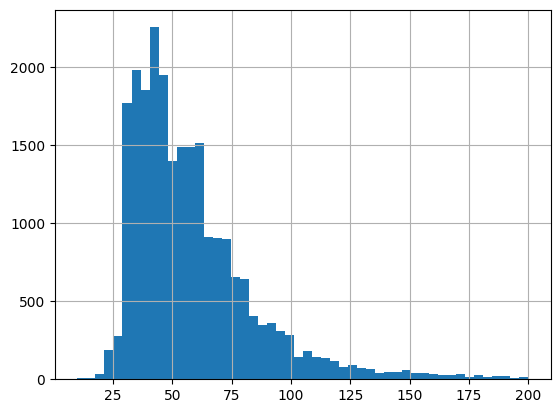

In [232]:
df.total_area.hist(range=(10, 200), bins=50)

<AxesSubplot:>

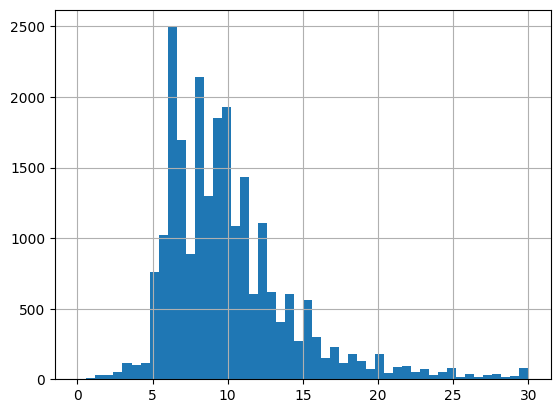

In [235]:
df.kitchen_area.hist(range=(0, 30), bins=50)

<AxesSubplot:>

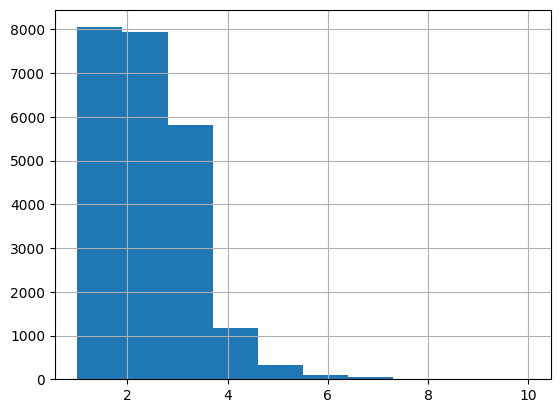

In [245]:
df.rooms.hist(range=(1, 10))

763000000.0

<AxesSubplot:>

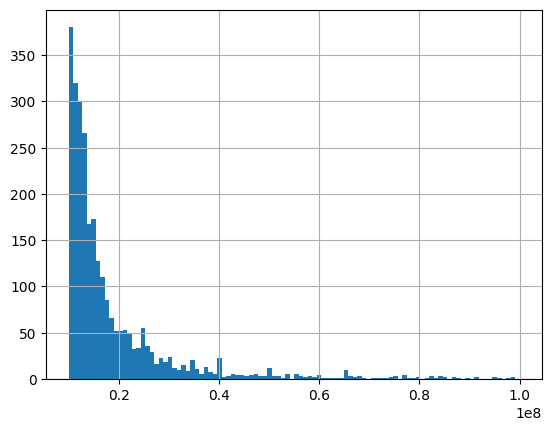

In [249]:
df.last_price.max()
df.last_price.hist(bins=100, range=(10000000, 100000000))

<AxesSubplot:>

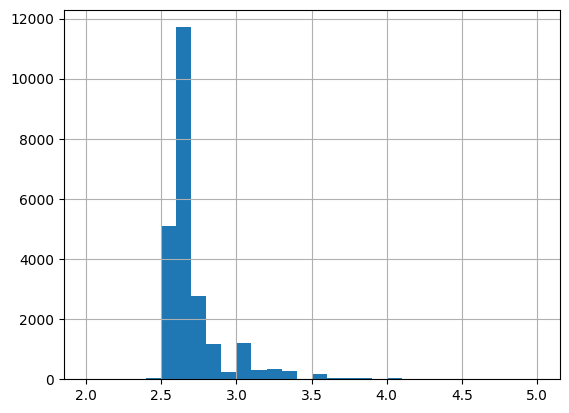

In [255]:
df.ceiling_height.hist(range=(2, 5), bins=30)

<AxesSubplot:>

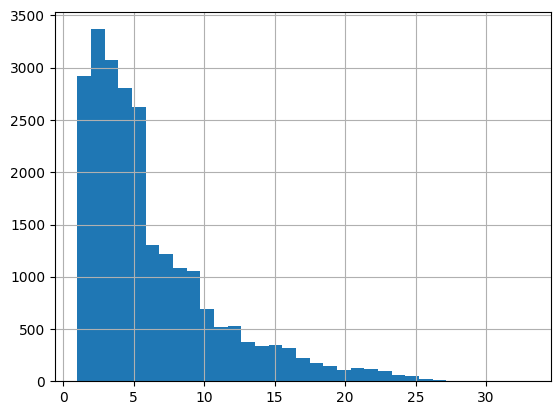

In [258]:
m = df.floor.max()
df.floor.hist(bins=m)

<AxesSubplot:>

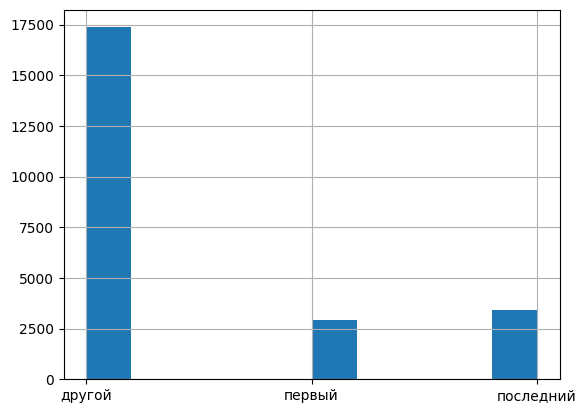

In [259]:
df.floor_type.hist()

<AxesSubplot:>

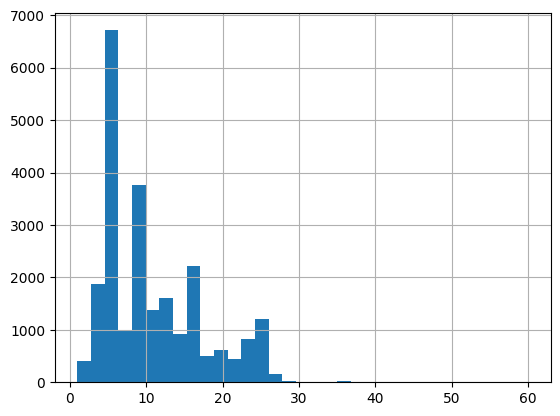

In [261]:
df.floors_total.hist(bins=m)

<AxesSubplot:>

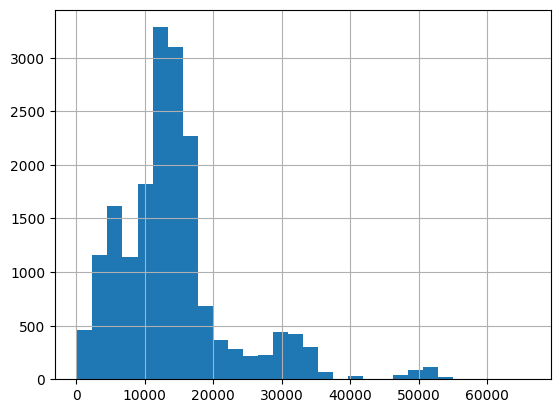

In [268]:
df.cityCenters_nearest.hist(bins=30)

<AxesSubplot:>

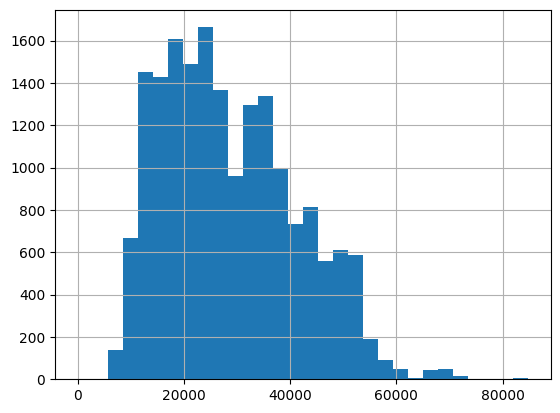

In [265]:
df.airports_nearest.hist(bins=30)

<AxesSubplot:>

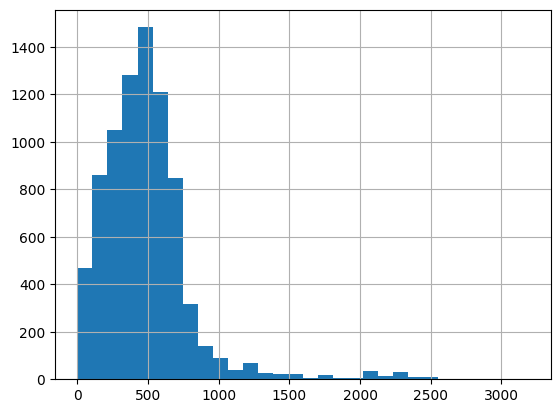

In [267]:
df.parks_nearest.hist(bins=30)

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод